<a href="https://colab.research.google.com/github/Subhraj07/Machine_Learning_Models/blob/master/MLpractice/CEREBRINOCS/test_cf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9

In [27]:
# # Run this cell to mount your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

# !ls "/content/drive/My Drive"
# !cp -r "/content/drive/My Drive/DL_AI" "/content/DL_AI"

# !cp -r "/content/drive/My Drive/DL_AI/Document_verification/Datasets/" "/content"
!rm -r "content/DL_AI"

rm: cannot remove 'content/DL_AI': No such file or directory


In [0]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import gc

In [34]:
train_dir = '/content/Datasets/Train'
test_dir = '/content/Datasets/Test'

# train_imgs = ['content/DL_AI/Document_verification/Datasets/Train/{}'.format(i) for i in os.listdir(train_dir)]
# test_imgs = ['content/DL_AI/Document_verification/Datasets/Test/{}'.format(i) for i in os.listdir(test_dir)]

# random.shuffle(train_imgs)

train_dogs = [str(train_dir) + "/{}".format(i) for i in os.listdir(train_dir) if 'dog' in i]
train_cats = [str(train_dir) + "/{}".format(i) for i in os.listdir(train_dir) if 'cat' in i]

test_imgs = [str(test_dir) + "/{}".format(i) for i in os.listdir(test_dir)]
train_imgs = train_dogs + train_cats
random.shuffle(train_imgs)

del train_dogs
del train_cats
gc.collect()

607

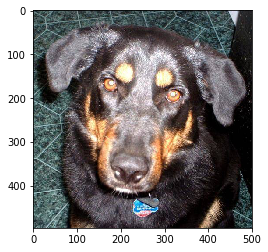

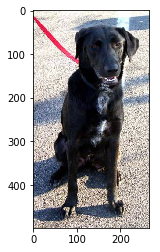

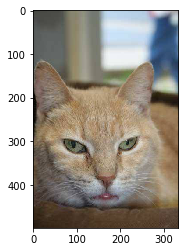

In [35]:
import matplotlib.image as mpimg

for ima in train_imgs[0:3]:
  img = mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3

In [0]:
def read_process_images(list_of_images):
  """
  Returns two arrays
  X is an array resized images
  y is an array of lebels
  """
  X = []
  y = []
  
  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))
    
    if 'dog' in image:
      y.append(1)
    elif 'cat' in image:
      y.append(0)
    
  return X,y

In [0]:
X,y = read_process_images(train_imgs)

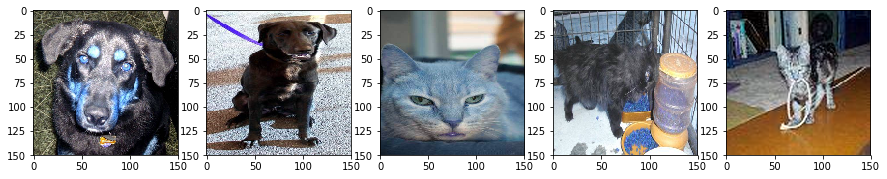

In [68]:
plt.figure(figsize=(15,10))
columns = 5
for i in range(columns):
  plt.subplot(5/columns + 1, columns, i+1)
  plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for cats and dogs')

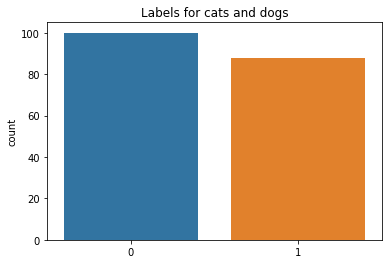

In [69]:
import seaborn as sns
del train_imgs
gc.collect()

X = np.array(X)
y = np.array(y)

sns.countplot(y)
plt.title("Labels for cats and dogs")

In [70]:
print(X.shape)
print(y.shape)

(188, 150, 150, 3)
(188,)


In [72]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("shape of train image is", X_train.shape)
print("shape of validation image is", X_val.shape)
print("shape of train label is", y_train.shape)
print("shape of validation label image is", y_val.shape)

shape of train image is (150, 150, 150, 3)
shape of validation image is (38, 150, 150, 3)
shape of train label is (150,)
shape of validation label image is (38,)


In [73]:
del X
del y
gc.collect()

10

In [0]:
n_train = len(X_train)
n_val = len(X_val)

# batch size should be factor of 2 : 2 , 4, 8, 16, 32, 64
batch_size = 32

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [77]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0625 09:03:46.329113 139890035545984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 09:03:46.351192 139890035545984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 09:03:46.425881 139890035545984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 09:03:46.492551 139890035545984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0625 09:03:46.505124 139890035545984 de

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [80]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

W0625 09:09:52.667532 139890035545984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 09:09:52.677334 139890035545984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0625 09:09:52.687859 139890035545984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_Datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_Datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = train_Datagen.flow(X_val, y_val, batch_size=batch_size)

In [93]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = n_train // batch_size,
                              epochs = 64,
                              validation_data = val_generator,
                              validation_steps = n_val // batch_size)

Epoch 1/64
4/4 [==============================] - 7s 2s/step - loss: 0.6099 - acc: 0.7106 - val_loss: 0.7100 - val_acc: 0.5000
Epoch 2/64
4/4 [==============================] - 6s 2s/step - loss: 0.6148 - acc: 0.6601 - val_loss: 0.6943 - val_acc: 0.5625
Epoch 3/64
4/4 [==============================] - 6s 2s/step - loss: 0.6054 - acc: 0.6641 - val_loss: 0.5029 - val_acc: 0.6667
Epoch 4/64
4/4 [==============================] - 6s 2s/step - loss: 0.5959 - acc: 0.6776 - val_loss: 0.6016 - val_acc: 0.6562
Epoch 5/64
4/4 [==============================] - 6s 2s/step - loss: 0.6318 - acc: 0.6356 - val_loss: 0.6222 - val_acc: 0.6667
Epoch 6/64
4/4 [==============================] - 6s 2s/step - loss: 0.6164 - acc: 0.6118 - val_loss: 0.5737 - val_acc: 0.6562
Epoch 7/64
4/4 [==============================] - 6s 1s/step - loss: 0.6357 - acc: 0.6249 - val_loss: 0.5651 - val_acc: 0.6667
Epoch 8/64
4/4 [==============================] - 7s 2s/step - loss: 0.6169 - acc: 0.6562 - val_loss: 0.5914 - 

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = n_train // batch_size,
                              epochs = 128,
                              validation_data = val_generator,
                              validation_steps = n_val // batch_size)

Epoch 1/128
4/4 [==============================] - 9s 2s/step - loss: 0.4986 - acc: 0.6992 - val_loss: 0.5453 - val_acc: 0.8125
Epoch 2/128
4/4 [==============================] - 6s 2s/step - loss: 0.5067 - acc: 0.7684 - val_loss: 0.8756 - val_acc: 0.5000
Epoch 3/128
4/4 [==============================] - 7s 2s/step - loss: 0.5669 - acc: 0.7020 - val_loss: 0.5444 - val_acc: 0.6562
Epoch 4/128
4/4 [==============================] - 6s 2s/step - loss: 0.5146 - acc: 0.7633 - val_loss: 0.6663 - val_acc: 0.6667
Epoch 5/128
4/4 [==============================] - 7s 2s/step - loss: 0.5555 - acc: 0.7266 - val_loss: 0.5716 - val_acc: 0.6875
Epoch 6/128
4/4 [==============================] - 6s 2s/step - loss: 0.5033 - acc: 0.7821 - val_loss: 0.6019 - val_acc: 0.6667
Epoch 7/128
4/4 [==============================] - 6s 2s/step - loss: 0.5183 - acc: 0.7577 - val_loss: 0.6163 - val_acc: 0.7188
Epoch 8/128
4/4 [==============================] - 6s 2s/step - loss: 0.5983 - acc: 0.6356 - val_loss: 0

In [0]:
# #Save the model
# model.save_weights('model_wieghts.h5')
# model.save('model_keras.h5')

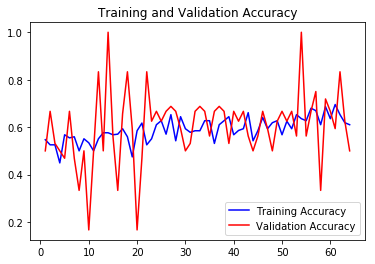

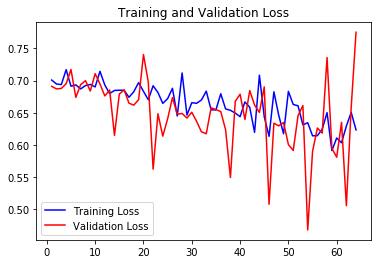

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

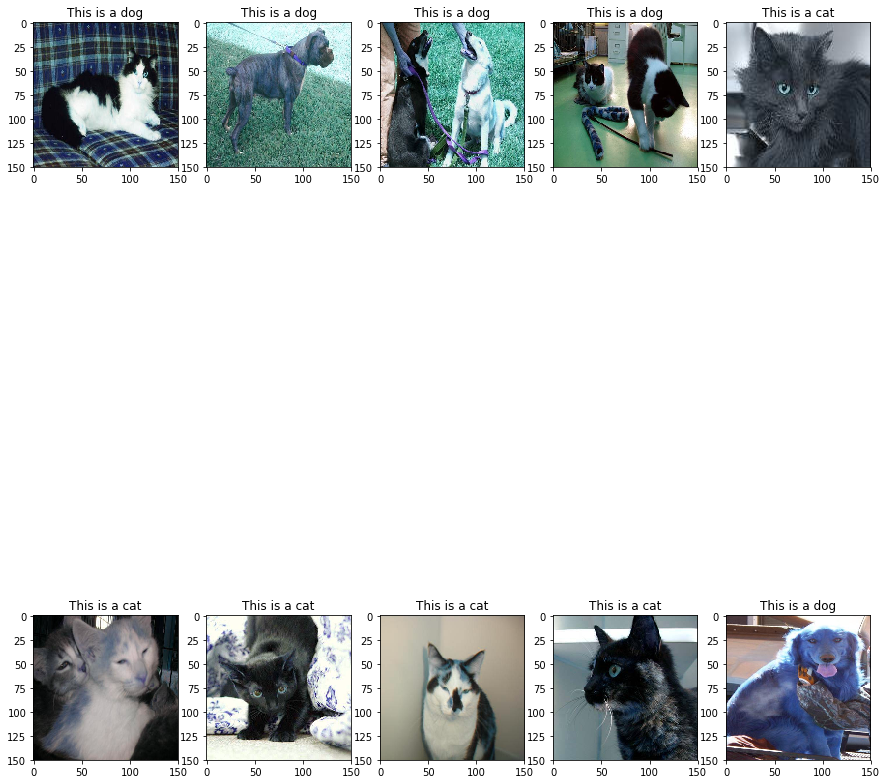

In [96]:
X_test, y_test = read_process_images(test_imgs[:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

i = 0
text_labels = []
plt.figure(figsize=(15,20))

for batch in test_datagen.flow(x, batch_size=1):
  pred = model.predict(batch)
  if pred>0.5:
    text_labels.append('dog')
  else:
    text_labels.append('cat')
  plt.subplot(5/columns + 1, columns, i+1)
  plt.title("This is a " + text_labels[i])
  imgplot = plt.imshow(batch[0])
  i +=1
  if i%10 == 0:
    break

plt.show()

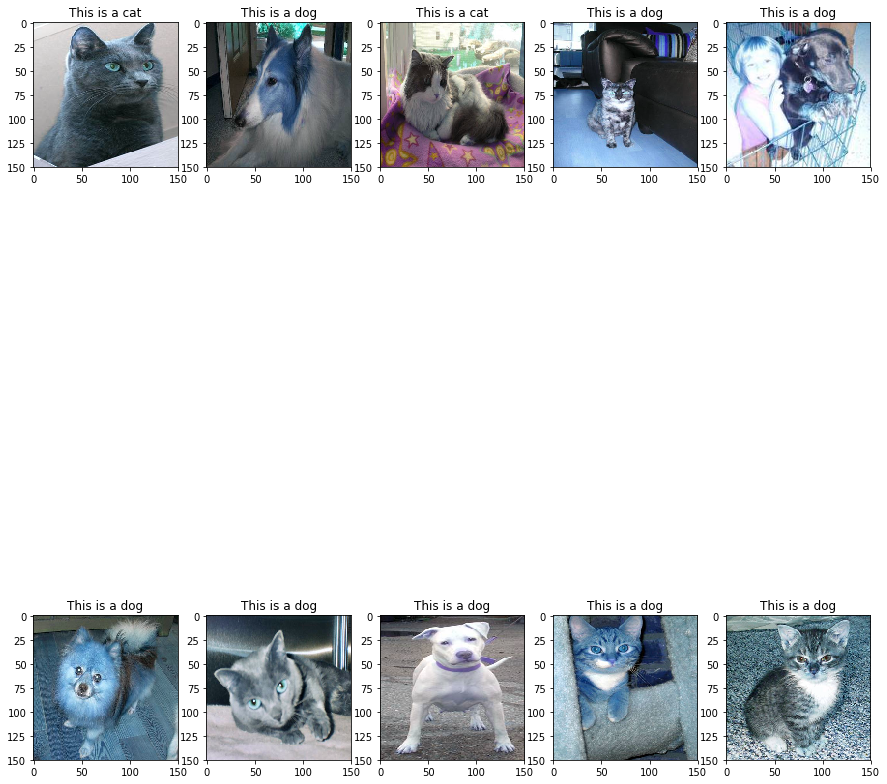

In [95]:
X_test, y_test = read_process_images(test_imgs[:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

i = 0
text_labels = []
plt.figure(figsize=(15,20))

for batch in test_datagen.flow(x, batch_size=1):
  pred = model.predict(batch)
  if pred>0.5:
    text_labels.append('dog')
  else:
    text_labels.append('cat')
  plt.subplot(5/columns + 1, columns, i+1)
  plt.title("This is a " + text_labels[i])
  imgplot = plt.imshow(batch[0])
  i +=1
  if i%10 == 0:
    break

plt.show()